# Import libraries 

In [1]:
import tensorflow as ts
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(10)
from os import listdir
from keras.utils import to_categorical
from skimage.io import imread
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import KFold

In [2]:
# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2

# Load Data

In [3]:
def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img

In [4]:
def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    labels = listdir(dataset_path)  # Geting labels
    X = []
    Y = []
    Z = []
    for i, label in enumerate(labels):
        datas_path = dataset_path + '/' + label
        for data in listdir(datas_path):
            img = get_img(datas_path + '/' + data)
            #plt.matshow(img)
            X.append(img)
            Z.append(img)
            Y.append(i)
        # Create dateset:
    X = np.array(X).astype('float32')
    Y = np.array(Y).astype('float32')
    return X,Y,Z

In [5]:
X , Y , img  = get_dataset('D:\Sign-Language-Digits-Dataset-master\Dataset')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=32)

In [6]:
print(x_train.shape)
x_train = x_train.reshape(len(x_train),64*64)
x_test = x_test.reshape(len(x_test),64*64)

(1649, 64, 64, 1)


In [7]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## First Neural Network architectures

In [8]:
def define_model1():
    model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(64*64,), activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy' , f1_m])

    return model

## Second Neural Network architectures

In [9]:
def define_model2():
    model = keras.Sequential([
    keras.layers.Dense(120, input_shape=(64*64,), activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_m])

   
    return model

In [10]:
model1 = define_model1()
model1.fit(x_train, y_train, epochs=50)
model1.evaluate(x_test,y_test)


Epoch 1/50
52/52 [==============================] - 1s 5ms/step - loss: 2.4299 - accuracy: 0.1243 - f1_m: 12.9429
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 2.1804 - accuracy: 0.2153 - f1_m: 7.9009
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 1.9259 - accuracy: 0.3432 - f1_m: 5.5883
Epoch 4/50
52/52 [==============================] - 0s 6ms/step - loss: 1.6544 - accuracy: 0.4190 - f1_m: 4.9842
Epoch 5/50
52/52 [==============================] - 0s 5ms/step - loss: 1.4927 - accuracy: 0.4882 - f1_m: 3.3274
Epoch 6/50
52/52 [==============================] - 0s 6ms/step - loss: 1.4208 - accuracy: 0.4815 - f1_m: 3.2191
Epoch 7/50
52/52 [==============================] - 0s 5ms/step - loss: 1.2453 - accuracy: 0.5622 - f1_m: 3.0272
Epoch 8/50
52/52 [==============================] - 0s 5ms/step - loss: 1.1407 - accuracy: 0.6173 - f1_m: 2.9508
Epoch 9/50
52/52 [==============================] - 0s 5ms/step - loss: 1.0145 - accuracy: 0.66

[0.8293222784996033, 0.7820823192596436, 2.091301202774048]

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               614550    
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 638,710
Trainable params: 638,710
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2 = define_model2()
model2.fit(x_train, y_train, epochs=50)
model2.evaluate(x_test,y_test)

Epoch 1/50
52/52 [==============================] - 1s 6ms/step - loss: 2.3729 - accuracy: 0.1092 - f1_m: 3.4684
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 2.1958 - accuracy: 0.2025 - f1_m: 3.5336
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 1.9744 - accuracy: 0.2996 - f1_m: 2.9575
Epoch 4/50
52/52 [==============================] - 0s 5ms/step - loss: 1.6819 - accuracy: 0.3814 - f1_m: 2.6975
Epoch 5/50
52/52 [==============================] - 0s 5ms/step - loss: 1.4776 - accuracy: 0.4700 - f1_m: 2.4344
Epoch 6/50
52/52 [==============================] - 0s 5ms/step - loss: 1.3013 - accuracy: 0.5367 - f1_m: 2.4409
Epoch 7/50
52/52 [==============================] - 0s 5ms/step - loss: 1.2330 - accuracy: 0.5700 - f1_m: 2.3559
Epoch 8/50
52/52 [==============================] - 0s 5ms/step - loss: 1.1793 - accuracy: 0.5834 - f1_m: 2.4205
Epoch 9/50
52/52 [==============================] - 0s 4ms/step - loss: 1.1042 - accuracy: 0.605

[0.7960856556892395, 0.8014527559280396, 2.1177773475646973]

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               491640    
                                                                 
 dense_4 (Dense)             (None, 160)               19360     
                                                                 
 dense_5 (Dense)             (None, 80)                12880     
                                                                 
 dense_6 (Dense)             (None, 10)                810       
                                                                 
Total params: 524,690
Trainable params: 524,690
Non-trainable params: 0
_________________________________________________________________


13/13 [==============================] - 0s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

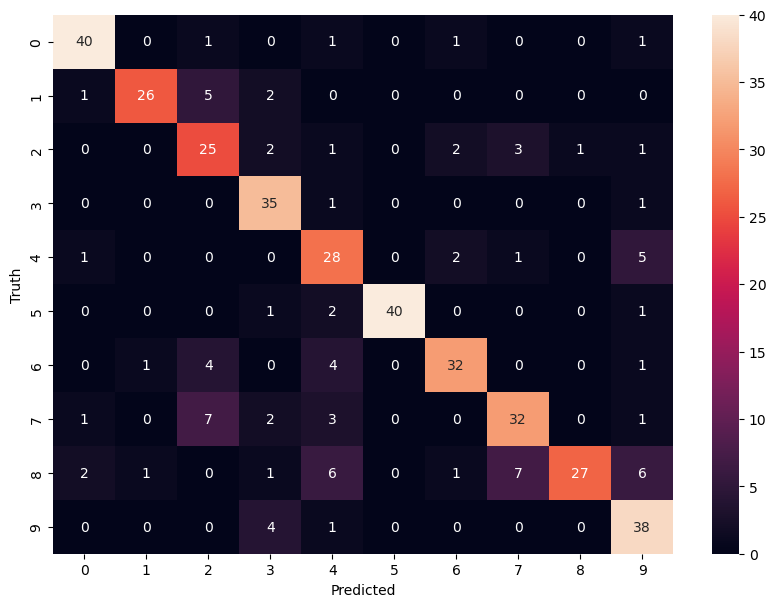

In [14]:
y_predicted1 = model1.predict(x_test)
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
cm1 = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)

plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

13/13 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

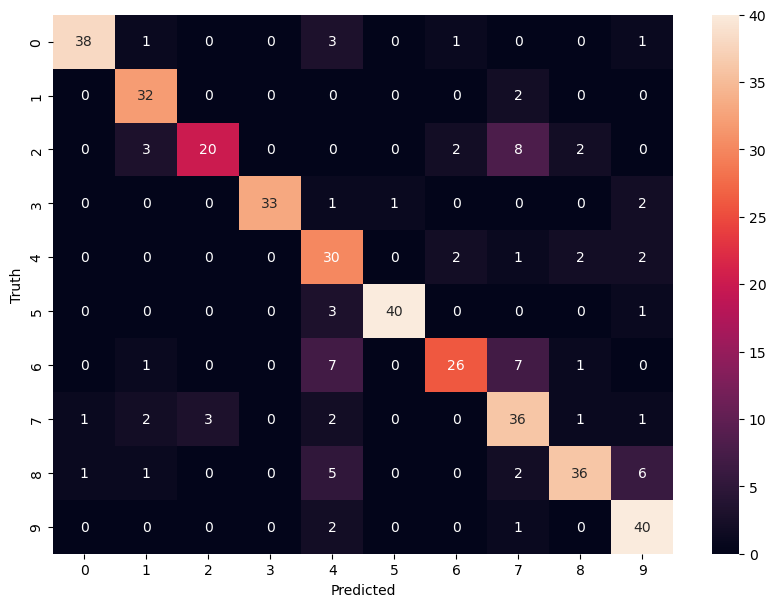

In [15]:
y_predicted2 = model2.predict(x_test)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
cm2 = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)

plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
#lo = y_test.shape[0]
#for i in range (lo):
#    print(y_test[i] , "========>" , y_predicted_labels[i])

9
9.0


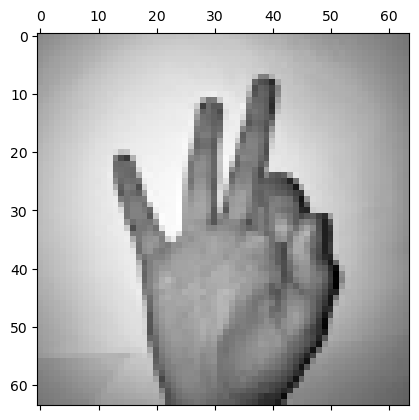

In [17]:
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,1)
plt.matshow(img,cmap = 'gray')
print(y_predicted_labels1[roro])
print(y_test[roro])

7
8.0


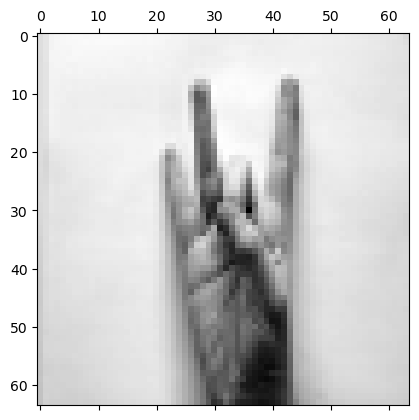

In [18]:
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,1)
plt.matshow(img,cmap = 'gray')
print(y_predicted_labels2[roro])
print(y_test[roro])

## Cross Over in Neural Network

In [19]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5 ,Model =define_model1()):
    scores, histories,f11 = list(), list() , list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        trainX = trainX.reshape(len(trainX),64*64)
        testX = testX.reshape(len(testX),64*64)
        model = Model
        model.fit(trainX, trainY, epochs=15)
        # fit model
        history = model
        # evaluate model
        _, acc,f1 = model.evaluate(testX,testY)
        # stores scores
        scores.append(acc)
        f11.append(f1)
        histories.append(history)
    return scores,f11, histories







In [20]:
scoresModel1,f11 , histories1 = evaluate_model(X,Y,3,model1)


Epoch 1/15
43/43 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.8886 - f1_m: 2.1123
Epoch 2/15
43/43 [==============================] - 0s 6ms/step - loss: 0.3640 - accuracy: 0.8850 - f1_m: 2.1599
Epoch 3/15
43/43 [==============================] - 0s 7ms/step - loss: 0.3929 - accuracy: 0.8734 - f1_m: 2.1377
Epoch 4/15
43/43 [==============================] - 0s 6ms/step - loss: 0.3485 - accuracy: 0.8952 - f1_m: 2.1500
Epoch 5/15
43/43 [==============================] - 0s 10ms/step - loss: 0.4211 - accuracy: 0.8603 - f1_m: 2.1570
Epoch 6/15
43/43 [==============================] - 1s 18ms/step - loss: 0.3442 - accuracy: 0.8974 - f1_m: 2.1220
Epoch 7/15
43/43 [==============================] - 0s 7ms/step - loss: 0.3799 - accuracy: 0.8690 - f1_m: 2.1435
Epoch 8/15
43/43 [==============================] - 1s 11ms/step - loss: 0.4138 - accuracy: 0.8639 - f1_m: 2.1295
Epoch 9/15
43/43 [==============================] - 0s 11ms/step - loss: 0.2936 - accuracy: 0

In [21]:
print(scoresModel1)
print(f11)
print(histories1)


[0.7529069781303406, 0.8922852873802185, 0.903930127620697]
[2.13615345954895, 2.0254733562469482, 1.9921061992645264]
[<keras.engine.sequential.Sequential object at 0x000001E9A79E48E0>, <keras.engine.sequential.Sequential object at 0x000001E9A79E48E0>, <keras.engine.sequential.Sequential object at 0x000001E9A79E48E0>]


In [22]:
scoresModel2 ,f22 , histories2 = evaluate_model(x_train,y_train,3,model2)


Epoch 1/15
35/35 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8826 - f1_m: 2.1616
Epoch 2/15
35/35 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.9199 - f1_m: 2.1824
Epoch 3/15
35/35 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 0.9381 - f1_m: 2.1542
Epoch 4/15
35/35 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9227 - f1_m: 2.1199
Epoch 5/15
35/35 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 0.9409 - f1_m: 2.1188
Epoch 6/15
35/35 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.8653 - f1_m: 2.1219
Epoch 7/15
35/35 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.8817 - f1_m: 2.1781
Epoch 8/15
35/35 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.8963 - f1_m: 2.1535
Epoch 9/15
35/35 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.882

In [23]:
print(scoresModel2)
print(f22)
print(histories2)

[0.8872727155685425, 0.9327272772789001, 0.938069224357605]
[2.0844101905822754, 2.04179310798645, 2.035747766494751]
[<keras.engine.sequential.Sequential object at 0x000001E9B2147700>, <keras.engine.sequential.Sequential object at 0x000001E9B2147700>, <keras.engine.sequential.Sequential object at 0x000001E9B2147700>]


## With CNN

In [24]:
print(x_train.shape)

(1649, 4096)


In [25]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(64, 64 ,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_m])

In [27]:
x_train = x_train.reshape(len(x_train),64,64,1)
x_test = x_test.reshape(len(x_test),64,64,1)
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 3s 47ms/step - loss: 2.0025 - accuracy: 0.3002 - f1_m: 2.1715
Epoch 2/10
52/52 [==============================] - 3s 54ms/step - loss: 0.8382 - accuracy: 0.7283 - f1_m: 1.9733
Epoch 3/10
52/52 [==============================] - 3s 49ms/step - loss: 0.5797 - accuracy: 0.8211 - f1_m: 1.9726
Epoch 4/10
52/52 [==============================] - 2s 44ms/step - loss: 0.4468 - accuracy: 0.8660 - f1_m: 1.9558
Epoch 5/10
52/52 [==============================] - 4s 79ms/step - loss: 0.3503 - accuracy: 0.8939 - f1_m: 1.9458
Epoch 6/10
52/52 [==============================] - 3s 52ms/step - loss: 0.2545 - accuracy: 0.9169 - f1_m: 1.9217
Epoch 7/10
52/52 [==============================] - 3s 50ms/step - loss: 0.1913 - accuracy: 0.9460 - f1_m: 1.9067
Epoch 8/10
52/52 [==============================] - 2s 48ms/step - loss: 0.1353 - accuracy: 0.9582 - f1_m: 1.8713
Epoch 9/10
52/52 [==============================] - 3s 49ms/step - loss: 0.1133 - accura

In [28]:
cnn.evaluate(x_test,y_test)

13/13 [==============================] - 1s 37ms/step - loss: 0.3989 - accuracy: 0.8862 - f1_m: 1.8332


[0.39894628524780273, 0.8861985206604004, 1.8332163095474243]

In [29]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [30]:
y_pred = cnn.predict(x_test)

13/13 [==============================] - 1s 47ms/step


5
5.0


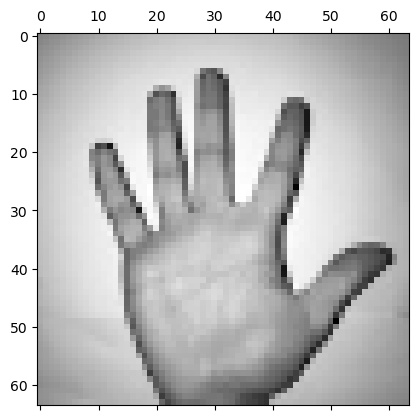

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,1)
plt.matshow(img,cmap = 'gray')
print(y_classes[roro])
print(y_test[roro])

## CNN with RGB

In [32]:

def get_imgCnn(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size,3))
    return img

In [33]:
def get_datasetCnn(dataset_path='Dataset'):
    # Getting all data from data path:
    labels = listdir(dataset_path)  # Geting labels
    X = []
    Y = []
    Z = []
    for i, label in enumerate(labels):
        datas_path = dataset_path + '/' + label
        for data in listdir(datas_path):
            img = get_imgCnn(datas_path + '/' + data)
            #plt.matshow(img)
            X.append(img)
            Z.append(img)
            Y.append(i)
        # Create dateset:
    X = np.array(X).astype('float32')
    Y = np.array(Y).astype('float32')
    X *=255.0
    # calculate average for all images
    m=X.mean()
    return X,Y,Z,m

In [34]:
Xcnn ,Ycnn , img , m =  get_datasetCnn(dataset_path='D:\Sign-Language-Digits-Dataset-master\Dataset')

x_train2, x_test2, y_train2, y_test2  = train_test_split(Xcnn, Ycnn, test_size=test_size, random_state=32)


In [35]:
print(x_train2[0].shape)

(64, 64, 3)


In [36]:
#Subtract this averages from each image ,Divide each image by 255
x_train2 = x_train2 -m
x_train2 /=255.0
x_test2 = x_test2 -m
x_test2 /=255.0

In [37]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(64, 64 ,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [38]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_m])

In [39]:
cnn.fit(x_train2, y_train2, epochs=10)

Epoch 1/10
52/52 [==============================] - 4s 58ms/step - loss: 1.3596 - accuracy: 0.5482 - f1_m: 2.5560
Epoch 2/10
52/52 [==============================] - 4s 86ms/step - loss: 0.5648 - accuracy: 0.8229 - f1_m: 2.1881
Epoch 3/10
52/52 [==============================] - 3s 62ms/step - loss: 0.3256 - accuracy: 0.8963 - f1_m: 2.0529
Epoch 4/10
52/52 [==============================] - 3s 62ms/step - loss: 0.1845 - accuracy: 0.9509 - f1_m: 1.9908
Epoch 5/10
52/52 [==============================] - 3s 53ms/step - loss: 0.1227 - accuracy: 0.9600 - f1_m: 1.9011
Epoch 6/10
52/52 [==============================] - 2s 47ms/step - loss: 0.0781 - accuracy: 0.9788 - f1_m: 1.9126
Epoch 7/10
52/52 [==============================] - 4s 71ms/step - loss: 0.0468 - accuracy: 0.9885 - f1_m: 1.8852
Epoch 8/10
52/52 [==============================] - 2s 42ms/step - loss: 0.0164 - accuracy: 0.9921 - f1_m: 1.8383
Epoch 9/10
52/52 [==============================] - 2s 46ms/step - loss: 0.0085 - accura

In [40]:
cnn.evaluate(x_test2,y_test2)

13/13 [==============================] - 1s 20ms/step - loss: 0.5454 - accuracy: 0.8620 - f1_m: 1.7503


[0.5454487800598145, 0.861985445022583, 1.7503063678741455]

In [41]:
y_pred = cnn.predict(x_test2)

13/13 [==============================] - 1s 35ms/step


In [42]:
def define_model4():
    cn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(64, 64 ,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

    cn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_m])

   
    return cn

# evaluate a model using k-fold cross-validation
def evaluate_model_CNN(dataX, dataY, n_folds=5 ,Model = define_model4()):
    scores, histories,f11 = list(), list(),list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        model = Model
        model.fit(trainX, trainY, epochs=10)
        # fit model
        history = model
        # evaluate model
        _, acc,f1 = model.evaluate(testX,testY)
        # stores scores
        scores.append(acc)
        f11.append(f1)
        histories.append(history)
    return scores,f11, histories


In [43]:
scoresModel3 ,f11, histories3 = evaluate_model_CNN(Xcnn ,Ycnn,3 )


Epoch 1/10
43/43 [==============================] - 4s 69ms/step - loss: 34.2151 - accuracy: 0.2598 - f1_m: 2.1792
Epoch 2/10
43/43 [==============================] - 3s 78ms/step - loss: 0.9836 - accuracy: 0.6769 - f1_m: 2.1254
Epoch 3/10
43/43 [==============================] - 2s 43ms/step - loss: 0.6265 - accuracy: 0.7999 - f1_m: 2.1384
Epoch 4/10
43/43 [==============================] - 2s 44ms/step - loss: 0.4278 - accuracy: 0.8566 - f1_m: 2.0019
Epoch 5/10
43/43 [==============================] - 2s 53ms/step - loss: 0.2938 - accuracy: 0.9127 - f1_m: 2.0043
Epoch 6/10
43/43 [==============================] - 2s 55ms/step - loss: 0.2046 - accuracy: 0.9410 - f1_m: 1.9566
Epoch 7/10
43/43 [==============================] - 2s 43ms/step - loss: 0.1307 - accuracy: 0.9498 - f1_m: 1.9228
Epoch 8/10
43/43 [==============================] - 2s 45ms/step - loss: 0.0847 - accuracy: 0.9672 - f1_m: 1.8959
Epoch 9/10
43/43 [==============================] - 3s 80ms/step - loss: 0.0658 - accur

In [44]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [45]:
print(scoresModel3)
print(f11)
print(histories3)

[0.7979651093482971, 0.8267831206321716, 0.7525473237037659]
[1.7757039070129395, 1.7426003217697144, 1.7156798839569092]
[<keras.engine.sequential.Sequential object at 0x000001E9B8E80400>, <keras.engine.sequential.Sequential object at 0x000001E9B8E80400>, <keras.engine.sequential.Sequential object at 0x000001E9B8E80400>]


In [48]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=42)
x_train2  = x_train2.reshape(len(x_train2),64*64*3)
# fit model
svm.fit(x_train2, y_train2)


SVC(kernel='linear', probability=True, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score
x_test2 = x_test2.reshape(len(x_test2),64*64*3)
y_predd = svm.predict(x_test2)

# calculate accuracy
accuracy = accuracy_score(y_test2, y_predd)
print('Model SVM accuracy is: ', accuracy)


Model SVM accuracy is:  0.8111380145278451


In [53]:
print(scoresModel3)

[0.7979651093482971, 0.8267831206321716, 0.7525473237037659]
